In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
df = pd.read_excel('building_data.xlsx')
df

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]

In [7]:
cols = {"X1" : "Relative Compactness","X2" : "Surface Area", "X3" : "Wall Area",
        "X4" :"Roof Area", "X5" :"Overall Height", "X6" :"Orientation", "X7" :"Glazing Area",
        "X8" :"Glazing Area Distribution", "Y1" :"Heating Load", "Y2" :"Cooling Load"}

df.rename(columns = cols, inplace = True)
df

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0              2           0.0                          0         15.55   
1              3           0.0                          0         15.55   
2              4           0.0                          0         15.55   
3              5           0.0                          0         15.55   
4              2           0.0                          0         20.84   
..           ...           ...                        ...           ...   
763            5           0.4                          5         17.88   
764            2           0.4                          5         16.54   
765            3           0.4                          5         16.44   
766            4           0.4                          5         16.48   
767            5           0.4                          5         16.64   

     Cooling Load  
0           21.33  
1           21.33  
2           21.33  
3           21.33  
4           28.28  
..            ...  
763         21.40  
764         16.88  
765         17.11  
766         16.61  
767         16.03  

[768 rows x 10 columns]

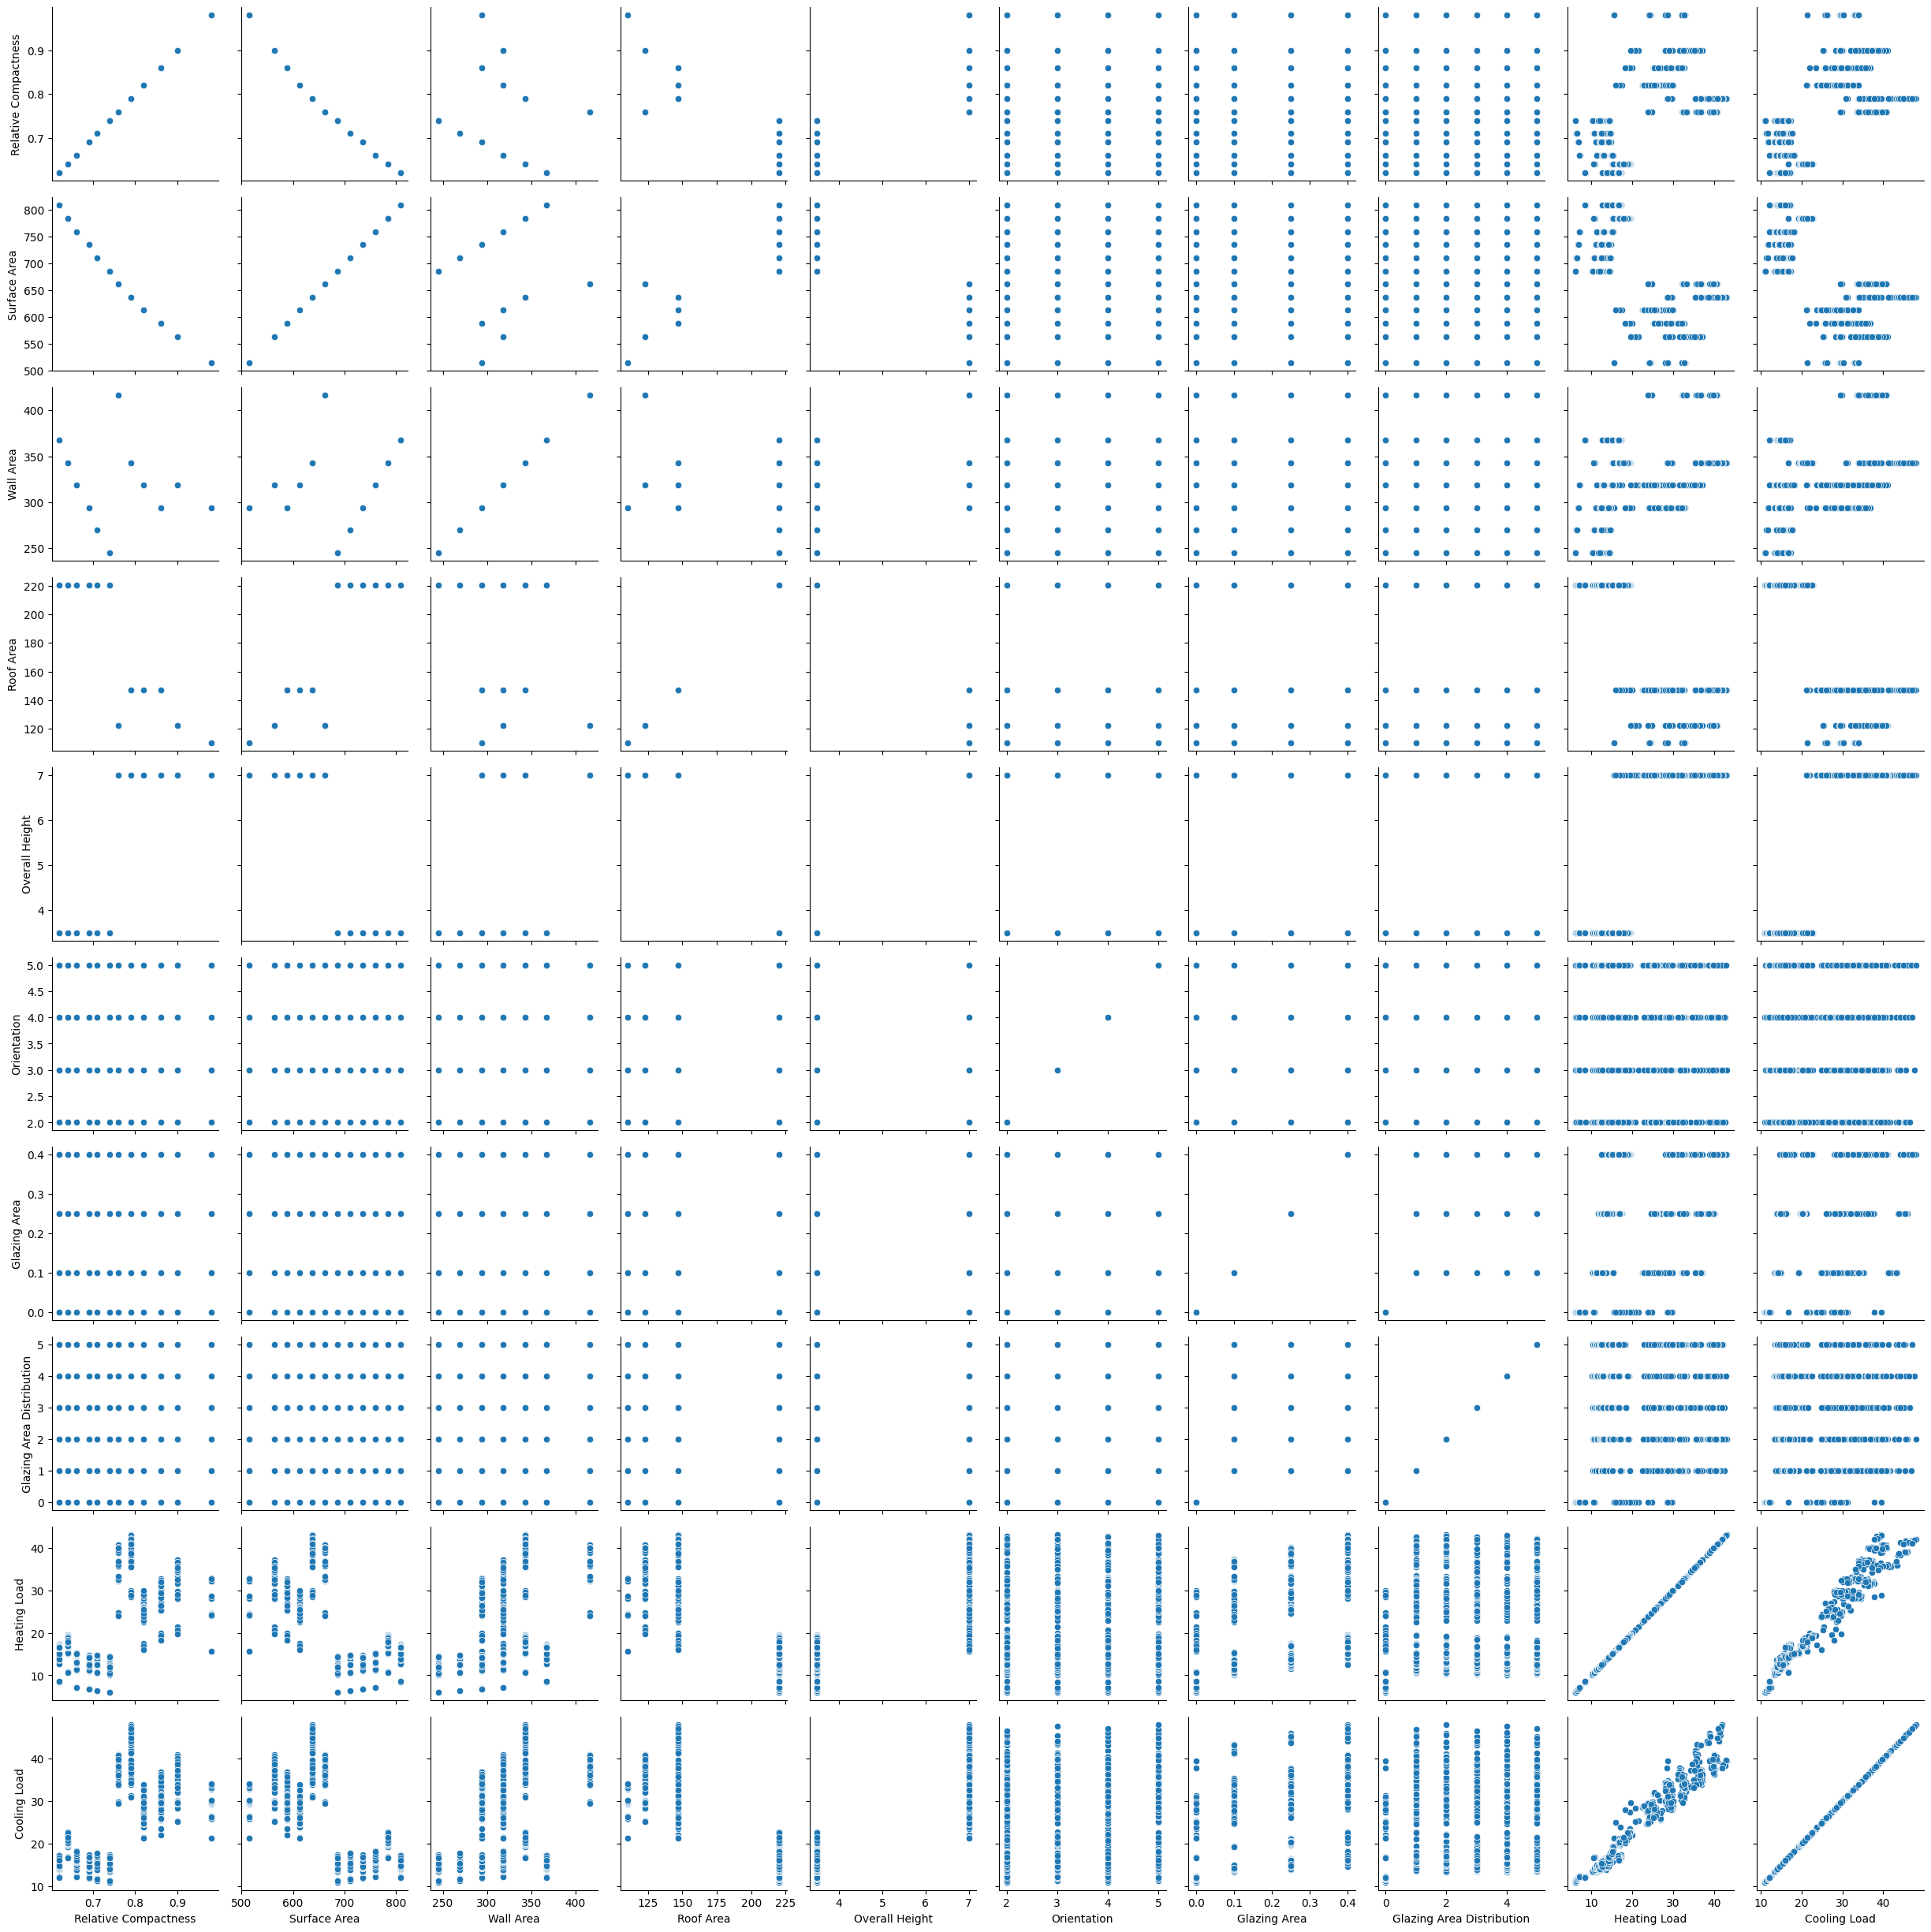

In [8]:
g = sn.PairGrid(df)
g.map(sn.scatterplot)

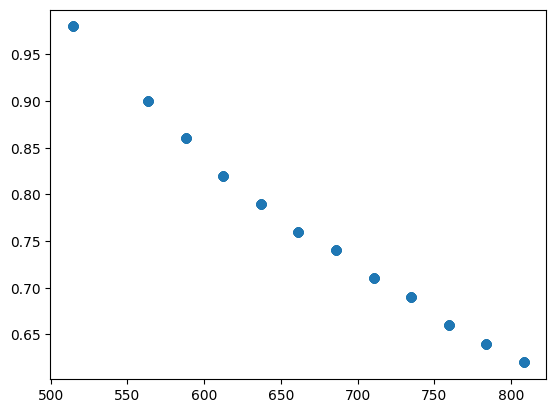

In [9]:
plt.scatter(df["Surface Area"], df["Relative Compactness"])

<Axes: >

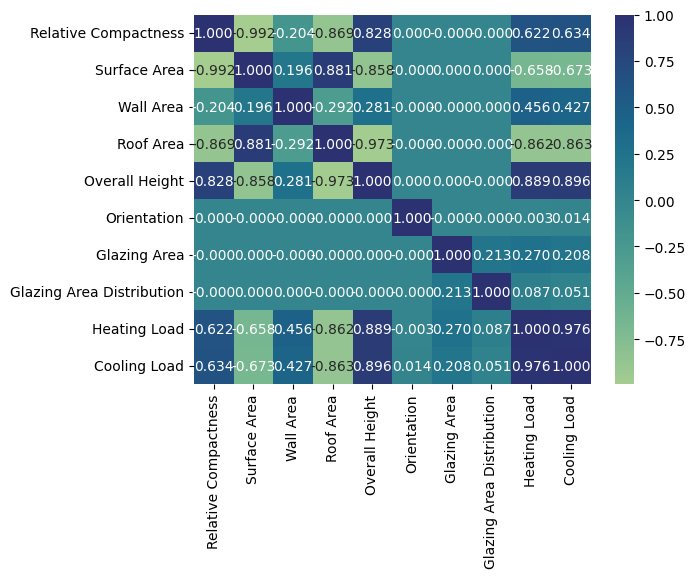

In [10]:
sn.heatmap(df.corr(), annot = True, linewidth=0, cmap = "crest", fmt = ".3f")

<Axes: >

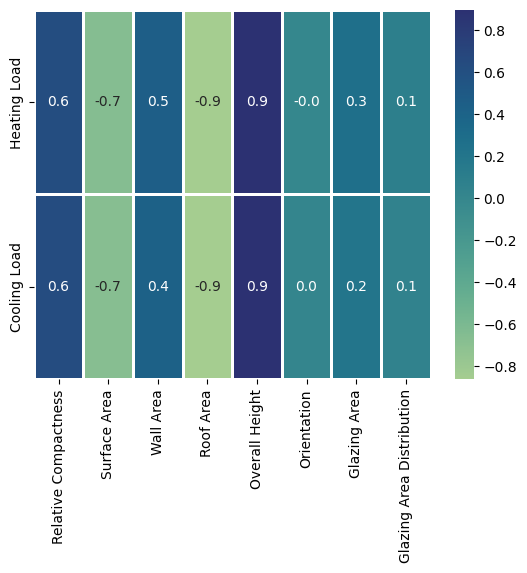

In [11]:
columns = list(df.columns)

df_corr = df.corr().drop(df[columns[:-2]])
df_corr.drop(["Heating Load", "Cooling Load"], axis = 1, inplace = True)
df_corr
sn.heatmap(df_corr, annot = True, linewidth=1, cmap = "crest", fmt = ".1f")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

model_feats = df.drop(columns = ['Glazing Area Distribution', 'Orientation'], axis = 1)

scaler = StandardScaler()

X = np.array(model_feats[model_feats.columns[:-2]])
y_heating = np.array(model_feats["Heating Load"])
y_cooling = np.array(model_feats["Cooling Load"])



X_standard = scaler.fit_transform(X)
y_standard_heating = scaler.fit_transform(y_heating.reshape(-1, 1))
y_standard_cooling = scaler.fit_transform(y_cooling.reshape(-1, 1))

X_standard.shape, y_standard_heating.shape, y_standard_cooling.shape

((768, 6), (768, 1), (768, 1))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X_standard, y_standard_heating, random_state = 21, test_size = 0.2,)

X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X_standard, y_standard_cooling, random_state = 21, test_size = 0.2,)

X_train.shape, y_train_heating.shape

((614, 6), (614, 1))

In [14]:
#function to test whether model is 

from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return mse, mae

In [15]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

models = [GradientBoostingRegressor(learning_rate = 0.01, random_state = 10), RandomForestRegressor(n_estimators = 70, random_state = 10), 
          LinearRegression(), SVR(), CatBoostRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 10)]

In [16]:
df_heating_results = pd.DataFrame(columns=['Model for Heating', 'MSE', 'MAE'])
df_cooling_results = pd.DataFrame(columns=['Model for Cooling', 'MSE', 'MAE'])

df_heating_results

Empty DataFrame
Columns: [Model for Heating, MSE, MAE]
Index: []

In [17]:
for model in models:
    heating_mse, heating_mae = train_performance(model, X_train, y_train_heating, X_test, y_test_heating)

    cooling_mse, cooling_mae = train_performance(model, X_train, y_train_cooling, X_test, y_test_cooling)

    df_heating_results = pd.concat([df_heating_results, pd.DataFrame([[model.__class__.__name__, 
                                                       heating_mse, heating_mae]], columns=['Model for Heating', 'MSE', 'MAE'])], axis=0)

    df_cooling_results = pd.concat([df_cooling_results, pd.DataFrame([[model.__class__.__name__, 
                                                       cooling_mse, cooling_mae]], columns=['Model for Cooling', 'MSE', 'MAE'])], axis=0)

df_heating_results

/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn

Learning rate set to 0.037906
0:	learn: 0.9678614	total: 60.3ms	remaining: 1m
1:	learn: 0.9386504	total: 60.5ms	remaining: 30.2s
2:	learn: 0.9072417	total: 60.8ms	remaining: 20.2s
3:	learn: 0.8798196	total: 61ms	remaining: 15.2s
4:	learn: 0.8526104	total: 61.2ms	remaining: 12.2s
5:	learn: 0.8244807	total: 61.4ms	remaining: 10.2s
6:	learn: 0.7998617	total: 61.6ms	remaining: 8.74s
7:	learn: 0.7737811	total: 61.8ms	remaining: 7.66s
8:	learn: 0.7484860	total: 62ms	remaining: 6.82s
9:	learn: 0.7254168	total: 62.2ms	remaining: 6.16s
10:	learn: 0.7012780	total: 62.3ms	remaining: 5.6s
11:	learn: 0.6785147	total: 62.5ms	remaining: 5.14s
12:	learn: 0.6565986	total: 63.4ms	remaining: 4.81s
13:	learn: 0.6390863	total: 63.4ms	remaining: 4.47s
14:	learn: 0.6200805	total: 63.5ms	remaining: 4.17s
15:	learn: 0.6021818	total: 63.7ms	remaining: 3.91s
16:	learn: 0.5847968	total: 63.8ms	remaining: 3.69s
17:	learn: 0.5705606	total: 63.9ms	remaining: 3.49s
18:	learn: 0.5526864	total: 64.1ms	remaining: 3.31s


Model for Heating       MSE       MAE
0  GradientBoostingRegressor  0.160271  0.347772
0      RandomForestRegressor  0.002282  0.034436
0           LinearRegression  0.081853  0.199139
0                        SVR  0.032847  0.123885
0          CatBoostRegressor  0.002380  0.034930
0        KNeighborsRegressor  0.010925  0.049529
0      DecisionTreeRegressor  0.002382  0.034946

In [18]:
df_heating_results

Model for Heating       MSE       MAE
0  GradientBoostingRegressor  0.160271  0.347772
0      RandomForestRegressor  0.002282  0.034436
0           LinearRegression  0.081853  0.199139
0                        SVR  0.032847  0.123885
0          CatBoostRegressor  0.002380  0.034930
0        KNeighborsRegressor  0.010925  0.049529
0      DecisionTreeRegressor  0.002382  0.034946

In [19]:
df_cooling_results

Model for Cooling       MSE       MAE
0  GradientBoostingRegressor  0.181894  0.351930
0      RandomForestRegressor  0.034380  0.115101
0           LinearRegression  0.109441  0.230239
0                        SVR  0.065420  0.163198
0          CatBoostRegressor  0.036231  0.116750
0        KNeighborsRegressor  0.051502  0.127090
0      DecisionTreeRegressor  0.036248  0.116763

In [20]:
#simple neural network to predict heating load

import torch
from torch import nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X_standard, y_standard_heating, test_size = 0.2, random_state = 21)

X_train = torch.from_numpy(X_train)
y_train_heating = torch.from_numpy(y_train_heating)
X_test = torch.from_numpy(X_test)
y_test_heating = torch.from_numpy(y_test_heating)

class Load_NN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.linear_layer1 = nn.Linear(in_features = 5, out_features = 5)
        # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)

        self.layers = nn.Sequential(
            nn.Linear(in_features = 6, out_features = 7, dtype = torch.float64),
            nn.Linear(in_features = 7, out_features = 1, dtype = torch.float64)
        )

    def forward(self, x):
        return self.layers(x)

In [21]:
nn_heat_model = Load_NN()
nn_heat_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[-0.3293,  0.3761,  0.2140,  0.2385,  0.0871,  0.1361],
                      [-0.2273,  0.1007, -0.2881, -0.2663,  0.1068, -0.3899],
                      [ 0.0812,  0.2417,  0.1045,  0.1898,  0.1238,  0.2853],
                      [-0.1184,  0.0583, -0.1817, -0.2420, -0.3249, -0.0307],
                      [ 0.2829, -0.2713,  0.0323,  0.3545,  0.1736, -0.3781],
                      [ 0.0844,  0.1265,  0.1082, -0.1878,  0.0784,  0.2814],
                      [ 0.3526,  0.1957,  0.0563,  0.2726,  0.1519,  0.2828]],
                     dtype=torch.float64)),
             ('layers.0.bias',
              tensor([-0.1414,  0.3885,  0.0067, -0.3941,  0.3637,  0.1353, -0.0154],
                     dtype=torch.float64)),
             ('layers.1.weight',
              tensor([[ 0.2713, -0.0288,  0.3476,  0.3769,  0.2309, -0.0021, -0.0124]],
                     dtype=torch.float64)),
             ('layers.1.bias', tensor([0.1510], dt

In [22]:
with torch.inference_mode():
    raw_pred = nn_heat_model(X_test)

raw_pred

tensor([[ 0.4531],
        [ 0.3507],
        [-0.5627],
        [ 0.2423],
        [-0.2988],
        [ 0.3422],
        [ 0.4340],
        [-0.0507],
        [-0.1006],
        [ 0.2922],
        [ 0.1732],
        [-0.1999],
        [-0.2998],
        [ 0.4840],
        [ 0.4340],
        [-0.0507],
        [ 0.1505],
        [-0.1735],
        [-0.1006],
        [ 0.4840],
        [ 0.4531],
        [ 0.5530],
        [-0.3987],
        [-0.1339],
        [-0.0508],
        [-0.4628],
        [ 0.5031],
        [ 0.4531],
        [-0.1006],
        [-0.1507],
        [ 0.3422],
        [-0.3488],
        [ 0.5530],
        [ 0.1732],
        [-0.0007],
        [ 0.1005],
        [-0.2234],
        [ 0.3150],
        [-0.3987],
        [ 0.2004],
        [-0.2988],
        [-0.0508],
        [-0.2234],
        [-0.1999],
        [-0.1507],
        [-0.1999],
        [ 0.2004],
        [ 0.5031],
        [ 0.2004],
        [ 0.5530],
        [ 0.2232],
        [-0.3488],
        [-0.

In [23]:
mae_loss_fn = nn.L1Loss()
mse_loss_fn = nn.MSELoss()
optimizer = optim.SGD(nn_heat_model.parameters(), lr=0.01)

def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"
    
epoch_counts = [i for i in range(200)]
heat_train_loss_track = []
heat_test_loss_track = []


torch.manual_seed(10)

epochs = 200

for epoch in range(epochs):
    nn_heat_model.train()

    y_pred = nn_heat_model(X_train)

    #mae_loss = mae_loss_fn(y_pred, y_train)
    mse_loss = mse_loss_fn(y_pred, y_train_heating)

    optimizer.zero_grad()

    mse_loss.backward()

    optimizer.step()

    nn_heat_model.eval()
    with torch.inference_mode():
        test_preds = nn_heat_model(X_test)

        test_mse_loss = mse_loss_fn(test_preds, y_test_heating)

    heat_train_loss_track.append(mse_loss.item())
    heat_test_loss_track.append(test_mse_loss.item())

    
    print(display_training(epoch, mse_loss, test_mse_loss))


Epoch: 0 | Train Loss: 1.5439928075358238 | Test Loss: 1.3666405660786103
Epoch: 1 | Train Loss: 1.4354162348300823 | Test Loss: 1.2795472444473475
Epoch: 2 | Train Loss: 1.3404114819407273 | Test Loss: 1.2022466539004513
Epoch: 3 | Train Loss: 1.2562456872206436 | Test Loss: 1.1328691838295137
Epoch: 4 | Train Loss: 1.180853534044776 | Test Loss: 1.0699805506099653
Epoch: 5 | Train Loss: 1.1126533992424938 | Test Loss: 1.012468431571984
Epoch: 6 | Train Loss: 1.0504207428334462 | Test Loss: 0.9594626153749423
Epoch: 7 | Train Loss: 0.9931990189481924 | Test Loss: 0.9102776409520484
Epoch: 8 | Train Loss: 0.9402357373255562 | Test Loss: 0.8643708278724856
Epoch: 9 | Train Loss: 0.8909357229102359 | Test Loss: 0.8213110305481701
Epoch: 10 | Train Loss: 0.8448263493353854 | Test Loss: 0.7807549873077992
Epoch: 11 | Train Loss: 0.8015312481552256 | Test Loss: 0.7424291313989739
Epoch: 12 | Train Loss: 0.7607501119909235 | Test Loss: 0.7061153888056312
Epoch: 13 | Train Loss: 0.72224294621

In [24]:
#simple neural network to predict heating load
import torch
from torch import nn
import torch.optim as optim

X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X_standard, y_standard_cooling, test_size = 0.2, random_state = 21)

X_train = torch.from_numpy(X_train)
y_train_cooling = torch.from_numpy(y_train_cooling)
X_test = torch.from_numpy(X_test)
y_test_cooling = torch.from_numpy(y_test_cooling)

class Load_NN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.linear_layer1 = nn.Linear(in_features = 5, out_features = 5)
        # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)

        self.layers = nn.Sequential(
            nn.Linear(in_features = 6, out_features = 7, dtype = torch.float64),
            nn.Linear(in_features = 7, out_features = 1, dtype = torch.float64)
        )

    def forward(self, x):
        return self.layers(x)

In [25]:
nn_cool_model = Load_NN()
nn_cool_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 1.3446e-01, -1.0709e-05,  1.7275e-01,  4.1112e-02,  3.6119e-01,
                       -9.5091e-02],
                      [ 1.0839e-01,  5.4622e-02, -1.3146e-01,  3.4288e-01,  9.5448e-02,
                        4.0473e-02],
                      [-3.3799e-01,  3.8355e-01, -2.0598e-01, -3.8050e-02, -2.8179e-01,
                        2.1407e-01],
                      [ 8.2796e-02, -3.9838e-02, -3.0140e-01, -2.7413e-01,  8.3180e-02,
                        1.0259e-01],
                      [ 3.0565e-01,  2.9448e-01, -2.5574e-01,  3.3241e-01, -3.9728e-01,
                        3.4927e-01],
                      [-3.2895e-01, -1.3605e-01,  3.3714e-01,  2.4129e-01, -1.9535e-01,
                        2.7248e-01],
                      [-4.9010e-02, -2.9447e-01, -3.7260e-01,  1.1111e-01, -3.5569e-02,
                        3.2642e-01]], dtype=torch.float64)),
             ('layers.0.bias',
              tensor([-0.0453,  0.269

In [26]:
mae_loss_fn_cool = nn.L1Loss()
mse_loss_fn_cool = nn.MSELoss()
optimizer = optim.SGD(nn_cool_model.parameters(), lr=0.01)

def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"
    
epoch_counts = [i for i in range(200)]
cool_train_loss_track = []
cool_test_loss_track = []


torch.manual_seed(10)

epochs = 200

for epoch in range(epochs):
    nn_cool_model.train()

    y_pred_cool = nn_cool_model(X_train)

    #mae_loss = mae_loss_fn(y_pred, y_train)
    mse_loss = mse_loss_fn_cool(y_pred_cool, y_train_cooling)

    optimizer.zero_grad()

    mse_loss.backward()

    optimizer.step()

    nn_cool_model.eval()
    with torch.inference_mode():
        test_preds = nn_cool_model(X_test)

        test_mse_loss = mse_loss_fn_cool(test_preds, y_test_cooling)

    cool_train_loss_track.append(mse_loss.item())
    cool_test_loss_track.append(test_mse_loss.item())

    
    print(display_training(epoch, mse_loss, test_mse_loss))

Epoch: 0 | Train Loss: 0.918781760769566 | Test Loss: 0.9002478287039222
Epoch: 1 | Train Loss: 0.8515661764881148 | Test Loss: 0.83273522564479
Epoch: 2 | Train Loss: 0.7919310678518753 | Test Loss: 0.7725181360396155
Epoch: 3 | Train Loss: 0.738818952116179 | Test Loss: 0.7186430836557867
Epoch: 4 | Train Loss: 0.6913643546992532 | Test Loss: 0.670317487718131
Epoch: 5 | Train Loss: 0.6488488512518484 | Test Loss: 0.6268741157673073
Epoch: 6 | Train Loss: 0.610668276771739 | Test Loss: 0.5877447850730663
Epoch: 7 | Train Loss: 0.5763085744646538 | Test Loss: 0.5524407267022883
Epoch: 8 | Train Loss: 0.5453278451260932 | Test Loss: 0.5205377905246038
Epoch: 9 | Train Loss: 0.5173428822918423 | Test Loss: 0.49166518998173914
Epoch: 10 | Train Loss: 0.4920189712186206 | Test Loss: 0.46549684707972105
Epoch: 11 | Train Loss: 0.469062071781793 | Test Loss: 0.4417446538434887
Epoch: 12 | Train Loss: 0.44821274710513326 | Test Loss: 0.42015315022158023
Epoch: 13 | Train Loss: 0.429241373261

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cooling Load')]

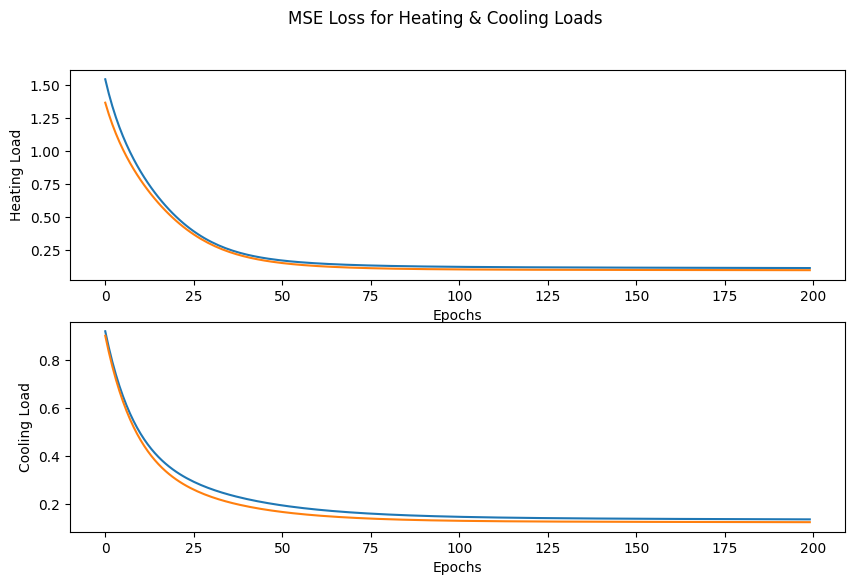

In [27]:
fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle('MSE Loss for Heating & Cooling Loads')
axs[0].plot(epoch_counts, heat_train_loss_track)
axs[0].plot(epoch_counts, heat_test_loss_track)
axs[0].set(xlabel='Epochs', ylabel='Heating Load')
axs[1].plot(epoch_counts, cool_train_loss_track)
axs[1].plot(epoch_counts, cool_test_loss_track)
axs[1].set(xlabel='Epochs', ylabel='Cooling Load')

In [43]:
df_heating_results.drop([9, 11, 12], inplace = True)
df_heating_results.loc[len(df_heating_results)] = ["Neural Network", heat_test_loss_track[-1], "NA"]
df_heating_results

Model for Heating       MSE       MAE
0  GradientBoostingRegressor  0.160271  0.347772
0      RandomForestRegressor  0.002282  0.034436
0           LinearRegression  0.081853  0.199139
0                        SVR  0.032847  0.123885
0          CatBoostRegressor  0.002380   0.03493
0        KNeighborsRegressor  0.010925  0.049529
0      DecisionTreeRegressor  0.002382  0.034946
7             Neural Network  0.098799        NA

In [34]:
df_cooling_results.loc[len(df_cooling_results)] = ["Neural Network", cool_test_loss_track[-1], "NA"]
df_cooling_results

Model for Cooling       MSE       MAE
0  GradientBoostingRegressor  0.181894   0.35193
0      RandomForestRegressor  0.034380  0.115101
0           LinearRegression  0.109441  0.230239
0                        SVR  0.065420  0.163198
0          CatBoostRegressor  0.036231   0.11675
0        KNeighborsRegressor  0.051502   0.12709
0      DecisionTreeRegressor  0.036248  0.116763
7             Neural Network  0.124409        NA

In [71]:
importance = models[1].feature_importances_
importance

array([0.55360274, 0.13924419, 0.02738879, 0.10807433, 0.11660499,
       0.05508495])

In [72]:
list(model_feats.columns[:-2])

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Roof Area',
 'Overall Height',
 'Glazing Area']

In [76]:
#plt.rcParams["figure.figsize"] = (600, 400)
sn.barplot(x = list(model_feats.columns[:-2]), y = list(models[1].feature_importances_))
plt.show()